## EDA(Exploratory Data Analysis) 보고서 1 

1. 데이터 이상치 확인 
2. 속성 간의 관계 분석

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

[?] 전체 데이터의 개수와 용량을 확인. test 데이터셋의 경우, label과 binary-label이 sample_submission에 있기 때문에 합쳐서 진행
[!] 

In [12]:
df_train = pd.read_csv('../data/train.csv')
df_dev = pd.read_csv('../data/dev.csv')

df_testdata = pd.read_csv('../data/test.csv')
df_testlabel = pd.read_csv('../data/sample_submission.csv')
df_test = pd.merge(df_testdata, df_testlabel)
df_test.rename(columns={'target': 'label'}, inplace=True)
df_test['binary-label'] = (df_test['label'] >= 2.5) * 1 # 기준이 2.5인 이유는 binary-label 기준 재확인에서 확인 가능

df_total = pd.concat((df_train, df_dev, df_test))

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))

print('----------')
print('Validation Set Shape = {}'.format(df_dev.shape))
print('Validation Set Memory Usage = {:.2f} MB'.format(df_dev.memory_usage().sum() / 1024**2))

print('----------')
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (9324, 6)
Training Set Memory Usage = 0.43 MB
----------
Validation Set Shape = (550, 6)
Validation Set Memory Usage = 0.03 MB
----------
Test Set Shape = (1100, 6)
Test Set Memory Usage = 0.06 MB


In [13]:
df_train.head(5)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [14]:
df_dev.head(5)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0


In [15]:
df_test.head(5)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-test-000,petition-sampled,가상화폐거래소 폐쇄하지 말고,가상화폐 거래소 폐쇄 반대합니다,3.5,1
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요,2.1,0
2,boostcamp-sts-v1-test-002,petition-rtt,기무사 영관급의 하극상 정말 이대로 방관하는게 민주주의 인지요,그냥 가만히 있는게 진짜 민주주의인가요?,2.3,0
3,boostcamp-sts-v1-test-003,nsmc-sampled,화까지가 한계였다.,기대가 너무 컸다...,1.0,0
4,boostcamp-sts-v1-test-004,slack-rtt,왜 혼자 있지.. ㅠㅠ,왜 혼자야.. ㅠㅠ,4.0,1


### 1. 데이터 이상치 확인하기
먼저 데이터에 누락된 부분은 없는지, 이상한 데이터는 없는지 살펴보는 것이 가장 우선이기 때문에
전체적인 추이와 특이사항을 살펴보자.

[ ! ] 이상치를 확인하기 위해 필요한 것
- 개별 데이터 관찰과 데이터 내 NaN, 중복이 존재하는지 확인하기
- 통계를 활용한 데이터의 평균과 분산 확인하기


---
- 개별 데이터 관찰하기

[?] 상단 5개, 하단 5개, 무작위 5개로 데이터를 눈으로 확인

[결론] 앞서 확인한 결과와 상단 5개, 하단 5개, 무작위 5개로 확인한 결과가 일치하였음


In [16]:
# 상단 5개에 해당하는 데이터 관찰하기
print('train_dataset')
df_train.head(5)

train_dataset


,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [17]:
# 하단 5개에 해당하는 데이터 관찰하기
df_train.tail(5)

,id,source,sentence_1,sentence_2,label,binary-label
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0
9323,boostcamp-sts-v1-train-9323,petition-sampled,법정공휴일 휴무관련 (근로자),법정공휴일의 유급휴무화를 막아야 합니다.,1.4,0.0


In [11]:
# 무작위 5개에 해당하는 데이터 관찰하기
df_train.sample(n=5)

,id,source,sentence_1,sentence_2,label,binary-label
1065,boostcamp-sts-v1-train-1065,petition-rtt,챔피언 '마스터 이' 버프를 요구합니다.,챔피언 '마스터이' 버프가 필요합니다.,3.8,1.0
7893,boostcamp-sts-v1-train-7893,slack-sampled,오늘 게더 티챗 하시는 분 안계신가용~~,혹시 오늘 상현 사무실에서 근무하시는 분 계실까요오?,0.0,0.0
3645,boostcamp-sts-v1-train-3645,petition-rtt,최저임금 차별화 적용,최저임금 차등 적용,4.0,1.0
3164,boostcamp-sts-v1-train-3164,petition-sampled,"대통령님 이번 여름 7,8월은 전기누진세를 없애주십시오","기록적인 폭염! 7,8월만이라도 전기료 누진세 없애주세요.",3.8,1.0
8319,boostcamp-sts-v1-train-8319,nsmc-sampled,견자단을 데리고 이것밖에 못만드냐 진짜..,견자단이 안 나오는데.....,0.8,0.0




[?] binary-label이 0일때와 1일때 조건으로 데이터를 관측 결과, 명시된 binary-label 기준이 2 이하이면 0, 3 이상이면 1보다 세분화되어있는 것을 확인함 (2와 3사이의 기준 누락)

[결론] total_data를 토대로 확인 결과 binary-label은 2.5 이상부터 1로 변환됨


In [19]:
condition = (df_total['binary-label'] == 1)
df_total[condition].head(5)

,id,source,sentence_1,sentence_2,label,binary-label
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
6,boostcamp-sts-v1-train-006,slack-rtt,전 암만 찍어도 까만 하늘.. ㅠㅠ,암만 찍어도 하늘은 까맣다.. ㅠㅠ,3.6,1.0
9,boostcamp-sts-v1-train-009,petition-sampled,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,4.2,1.0


In [20]:
condition = (df_total['binary-label'] == 0)
df_total[condition].head(5)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
7,boostcamp-sts-v1-train-007,nsmc-sampled,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ,이렇게 지겨운 공포영화는 처음..,0.6,0.0
8,boostcamp-sts-v1-train-008,petition-sampled,미세먼지 해결이 가장 시급한 문제입니다!,가장 시급한 것이 신생아실 관리입니다!!!,0.4,0.0


<AxesSubplot: xlabel='label', ylabel='binary-label'>

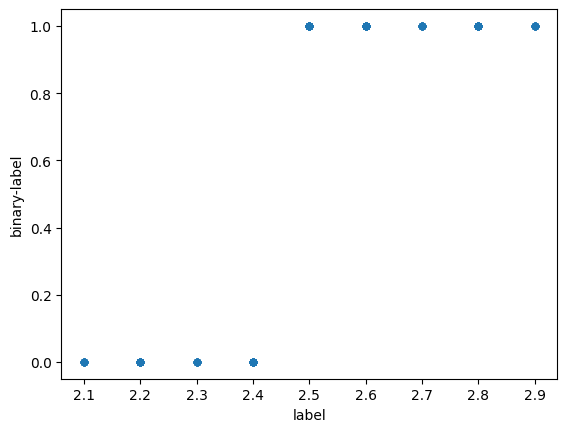

In [21]:
# binary-label 기준 재확인
condition = (df_total['label'] > 2) & (df_total['label'] < 3)
df_total[condition].plot.scatter(x='label', y='binary-label', alpha=0.5)


---
- 통계를 통해 데이터의 평균과 분산 확인

[결론] 
데이터 간에 분포하는 레이블에는 어느정도 차이를 보임


In [68]:
print('전체 데이터의 평균과 분산 : ')
df_total.describe()


전체 데이터의 평균과 분산 : 


,label,binary-label
count,10974.000000,10974.000000
mean,2.001996,0.420995
std,1.598368,0.493741
min,0.000000,0.000000
25%,0.400000,0.000000
50%,1.800000,0.000000
75%,3.600000,1.000000
max,5.000000,1.000000


In [ ]:
print('학습 데이터의 평균과 분산 : ')
df_train.describe()


학습 데이터의 평균과 분산 : 


,label,binary-label
count,9324.000000,9324.000000
mean,1.849968,0.389532
std,1.602212,0.487670
min,0.000000,0.000000
25%,0.200000,0.000000
50%,1.600000,0.000000
75%,3.400000,1.000000
max,5.000000,1.000000


In [ ]:
print('검증 데이터의 평균과 분산 : ')
df_dev.describe()

검증 데이터의 평균과 분산 : 


,label,binary-label
count,550.000000,550.000000
mean,2.584000,0.520000
std,1.459483,0.500055
min,0.000000,0.000000
25%,1.400000,0.000000
50%,2.600000,1.000000
75%,3.800000,1.000000
max,5.000000,1.000000


In [ ]:
print('테스트 데이터의 평균과 분산 : ')
df_test.describe()

테스트 데이터의 평균과 분산 : 


,label,binary-label
count,1100.000000,1100.000000
mean,2.999636,0.638182
std,1.142543,0.480745
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,1.000000
75%,4.000000,1.000000
max,5.000000,1.000000



---
- 데이터 누락 및 중복 체크 

[결론] 
1. 데이터 내 누락된 데이터는 존재하지 않음 
2. sentence_2 데이터 내에 중복된 데이터가 존재하나 id, sentence_1, sentence_2의 조합, 전체 col의 조합으로 보았을 때는 중복은 없음

In [63]:
# 데이터 누락 체크
print('column 별 데이터 누락 확인 : ')
na_check = [(col, df_total[col].isnull().values.any()) for col in list(df_total)]
for col, is_null in na_check:
    print(f'    {col} : {is_null}')
print(f'전체 데이터 누락 확인 : {df_total.isnull().values.any()}')


column 별 데이터 누락 확인 : 
    id : False
    source : False
    sentence_1 : False
    sentence_2 : False
    label : False
    binary-label : False
전체 데이터 누락 확인 : False


In [64]:
# 데이터 중복 체크
# 데이터의 특성을 고려하여 id, sentence_1과 sentence_2만 확인하였음
selected = ['id', 'sentence_1', 'sentence_2']
print('column 별 데이터 중복 확인 : ')
dup_check = [(col, df_total[col].duplicated().values.any()) for col in list(selected)]
for col, is_null in dup_check:
    print(f'    {col} : {is_null}') 
    
print(f'전체 데이터 중복 확인 : {df_total.duplicated(selected).values.any()}')



column 별 데이터 중복 확인 : 
    id : False
    sentence_1 : False
    sentence_2 : True
전체 데이터 중복 확인 : False


---
### 2. 속성 간의 관계 분석


[ ! ] 관계를 분석하기 위해 필요한 것
- sentence_1, sentence_2 간 분석
- source 별 sentence 분석
- 레이블 별 sentence 분석


---
-  sentence_1과 sentence_2의 문장 길이 차에 대한 데이터 관찰

[결론] 

1. 조금의 차이는 있지만 sentence_1과 setnence_2는 대부분 20-30 길이를 지니고 있음
2. 개별 데이터 관찰시에 문장의 길이도 확인하기 위해 공백을 포함한 문자 길이 분포를 확인  전반적으로 sentence_1와 sentence_2 페어의 길이 차는 거의 유사함을 확인할 수 있었음
3. sentence_1, sentence_2의 문장 길이 모두 10보다 짧은 데이터는 존재하지 않음. 
3. sentence_1, sentence_2의 문장 길이 중 하나가 100 이상인 데이터가 소규모 포함되어있음. 해당 데이터에 대한 전처리 판단이 필요
 

<AxesSubplot: title={'center': 'total dataset'}, ylabel='Frequency'>

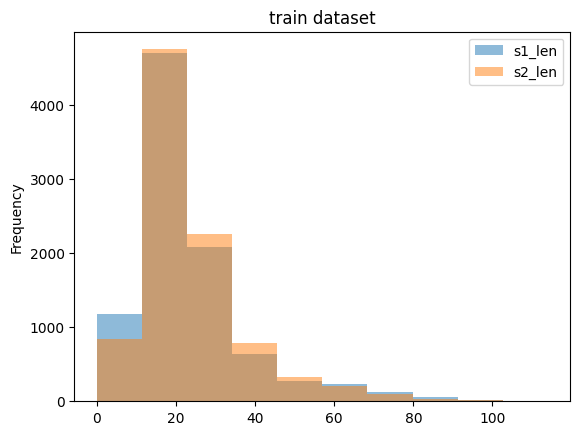

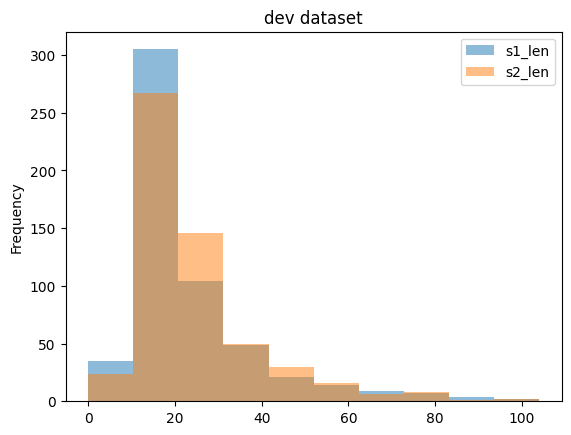

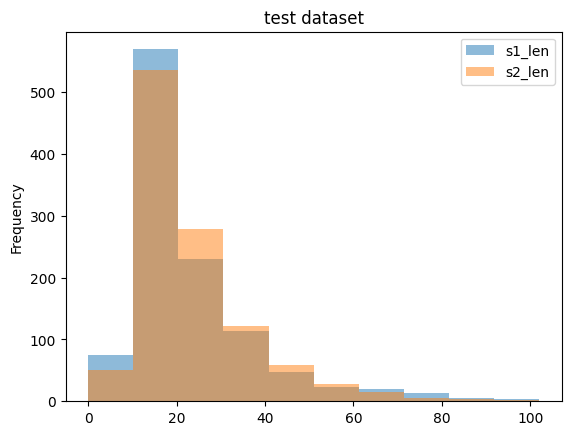

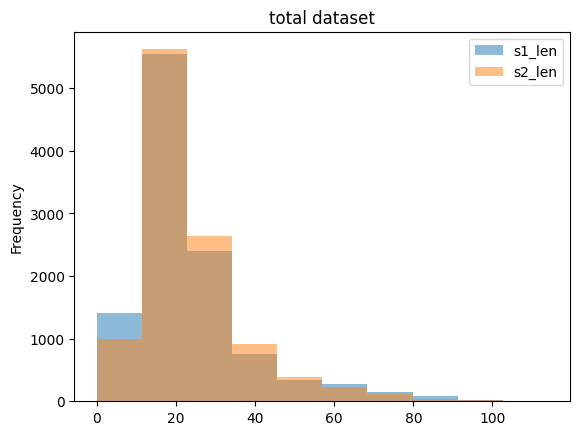

In [30]:
from matplotlib.pyplot import title


df_train['s1_len'] = df_train['sentence_1'].str.len()
df_train['s2_len'] = df_train['sentence_2'].str.len()
df_train.plot.hist(column=['s1_len', 's2_len'], bins=10, alpha=0.5, title='train dataset')

df_dev['s1_len'] = df_dev['sentence_1'].str.len()
df_dev['s2_len'] = df_dev['sentence_2'].str.len()
df_dev.plot.hist(column=['s1_len', 's2_len'], bins=10, alpha=0.5, title='dev dataset')

df_test['s1_len'] = df_test['sentence_1'].str.len()
df_test['s2_len'] = df_test['sentence_2'].str.len()
df_test.plot.hist(column=['s1_len', 's2_len'], bins=10, alpha=0.5, title='test dataset')

df_total['s1_len'] = df_total['sentence_1'].str.len()
df_total['s2_len'] = df_total['sentence_2'].str.len()
df_total.plot.hist(column=['s1_len', 's2_len'], bins=10, alpha=0.5, title='total dataset')

<AxesSubplot: title={'center': 'test dataset'}, xlabel='s1_len', ylabel='s2_len'>

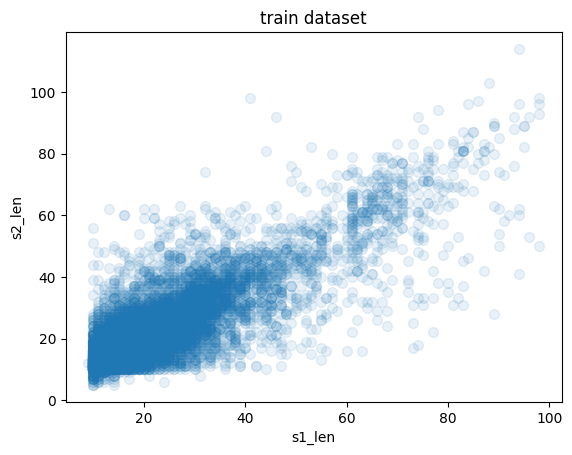

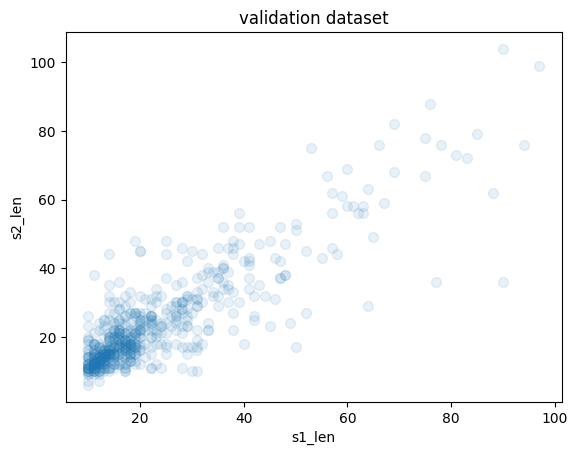

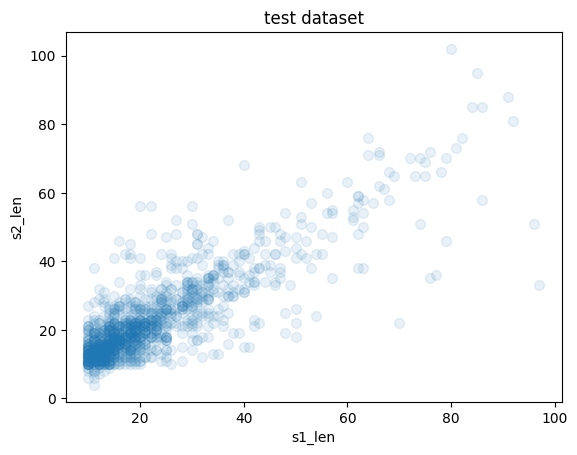

In [24]:
df_train.plot.scatter(x='s1_len', y='s2_len', s=50, alpha=0.1, title='train dataset')
df_dev.plot.scatter(x='s1_len', y='s2_len', s=50, alpha=0.1, title='validation dataset')
df_test.plot.scatter(x='s1_len', y='s2_len', s=50, alpha=0.1, title='test dataset')

array([<AxesSubplot: title={'center': 's1_len'}, xlabel='binary-label'>,
       <AxesSubplot: title={'center': 's2_len'}, xlabel='binary-label'>],
      dtype=object)

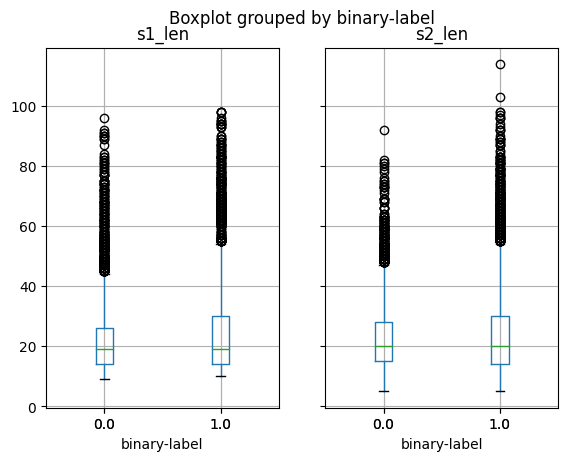

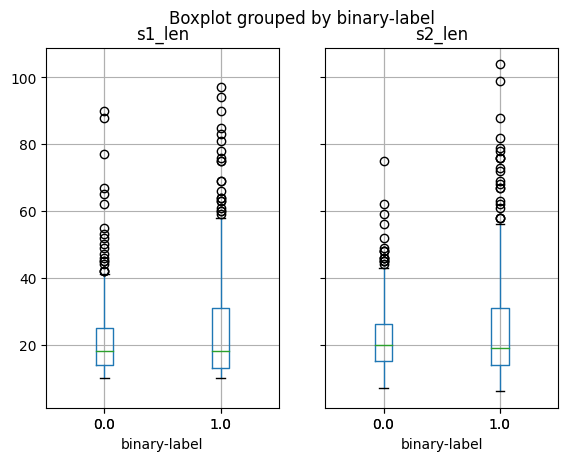

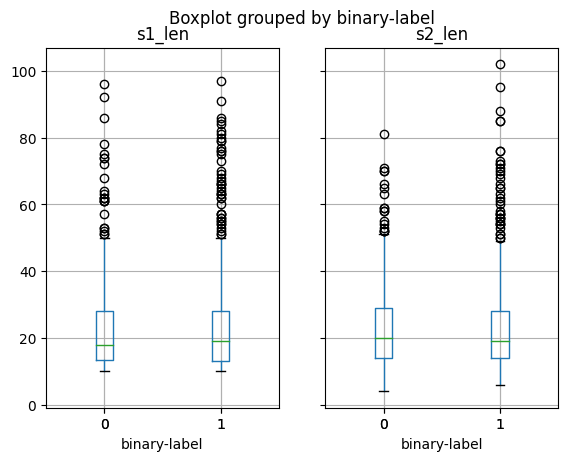

In [25]:
df_train.boxplot(['s1_len', 's2_len'], by='binary-label')
df_dev.boxplot(['s1_len', 's2_len'], by='binary-label')
df_test.boxplot(['s1_len', 's2_len'], by='binary-label')

[!] 길이 이상치의 경우, 전처리에 포함될 수 있기 때문에 train dataset을 대상으로만 수행하였음

sentence_1 길이가 10 미만인 데이터의 수 : 1
sentence_2 길이가 10 미만인 데이터의 수 : 91
sentence_1, sentence_2 모두 길이가 10 미만인 데이터의 수 : 0
sentence_1, sentence_2 둘 중 하나의 길이가 10 미만인 데이터의 수 : 92


<AxesSubplot: xlabel='s1_len', ylabel='s2_len'>

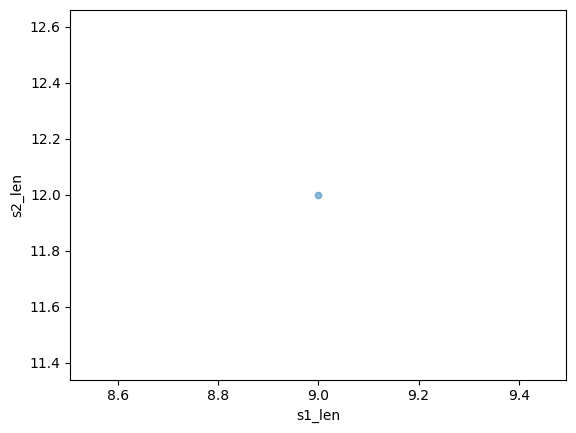

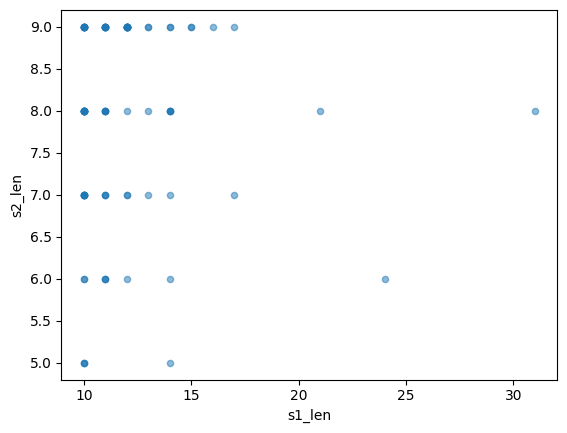

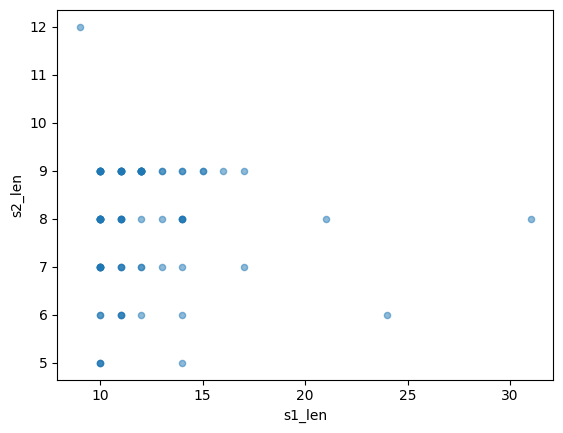

In [68]:
# s1_len과 s2_len 모두 작은 이상치 관측 
condition = (df_train['s1_len'] < 10)
print(f'sentence_1 길이가 10 미만인 데이터의 수 : {len(df_train[condition])}')
df_train[condition].plot.scatter(x='s1_len', y='s2_len', alpha=0.5)

condition = (df_train['s2_len'] < 10)
print(f'sentence_2 길이가 10 미만인 데이터의 수 : {len(df_train[condition])}')
df_train[condition].plot.scatter(x='s1_len', y='s2_len', alpha=0.5)

condition = (df_train['s1_len'] < 10) & (df_train['s2_len'] < 10)
print(f'sentence_1, sentence_2 모두 길이가 10 미만인 데이터의 수 : {len(df_train[condition])}')

condition = (df_train['s1_len'] < 10) | (df_train['s2_len'] < 10)
con_cnt = len(df_train[condition])
print(f'sentence_1, sentence_2 둘 중 하나의 길이가 10 미만인 데이터의 수 : {con_cnt}')
df_train[condition].plot.scatter(x='s1_len', y='s2_len', alpha=0.5)


sentence_1 길이가 100 이상인 데이터의 수 : 0
sentence_2 길이가 100 이상인 데이터의 수 : 2
sentence_1, sentence_2 길이가 모두 100 이상인 데이터의 수 : 0
sentence_1, sentence_2 모두 길이가 80 이상인 데이터의 수 : 2


,id,source,sentence_1,sentence_2,label,binary-label,s1_len,s2_len
1221,boostcamp-sts-v1-train-1221,nsmc-rtt,"시장경제, 자유민주주의에서 노력한만큼 얻는 것은 당연한것인데 그 세상에 적응 못하고...","시장경제와 자유민주주의에서는 최대한 많은 노력을 기울이는 것이 당연하지만, 그 세계...",3.2,1.0,88,103
2412,boostcamp-sts-v1-train-2412,nsmc-rtt,‥ 김민희를알수록 의심되는 정체. 완벽한연기. 완벽한몰입과스릴. 작은반전. 무엇보다...,‥ 김민희를 알면 알수록 의심스러워진다. 완벽한 연기. 완벽한 몰입과 스릴. 작은 ...,4.0,1.0,94,114


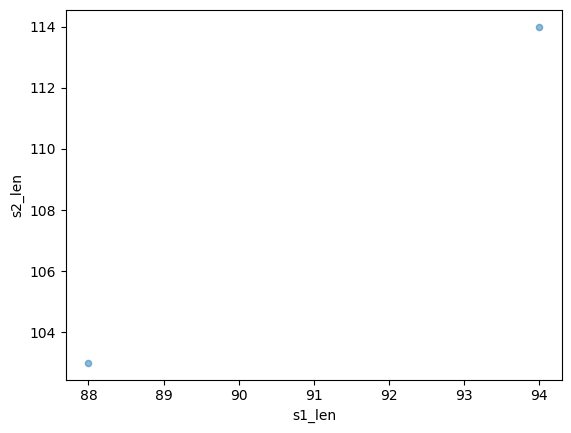

In [67]:
# s1_len과 s2_len의 큰 이상치 관측 

condition = (df_train['s1_len'] >= 100)
print(f'sentence_1 길이가 100 이상인 데이터의 수 : {len(df_train[condition])}')

condition = (df_train['s2_len'] >= 100)
print(f'sentence_2 길이가 100 이상인 데이터의 수 : {len(df_train[condition])}')

condition = (df_train['s1_len'] >= 100) & (df_train['s2_len'] >= 100)
print(f'sentence_1, sentence_2 길이가 모두 100 이상인 데이터의 수 : {len(df_train[condition])}')

condition = (df_train['s1_len'] >= 100) | (df_train['s2_len'] >= 100)
con_cnt = len(df_train[condition])
print(f'sentence_1, sentence_2 모두 길이가 80 이상인 데이터의 수 : {con_cnt}')
df_train[condition].plot.scatter(x='s1_len', y='s2_len', alpha=0.5)
df_train[condition].head(con_cnt)




---
-  source에 따른 데이터 분포 관찰

[결론] 

1.

[?] 데이터 간 source에 따른 데이터 분포 확인 

([<matplotlib.axis.YTick at 0x7f6cb4945610>,
 [Text(0, 0, 'nsmc-rtt'),
  Text(0, 1, 'nsmc-sampled'),
  Text(0, 2, 'petition-rtt'),
  Text(0, 3, 'petition-sampled'),
  Text(0, 4, 'slack-rtt'),
  Text(0, 5, 'slack-sampled')])

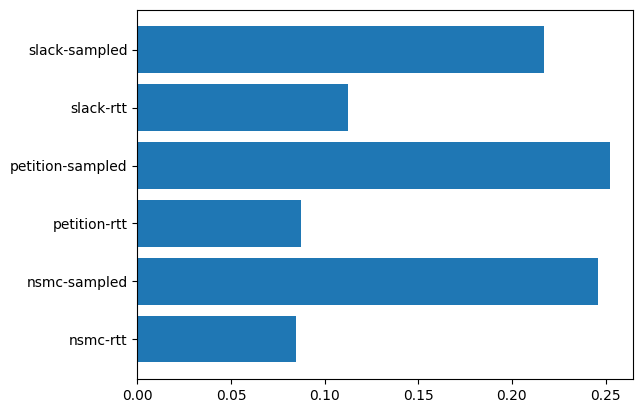

In [122]:
source_train = df_train['source'].value_counts().sort_index()
source_train_rate = source_train / source_train.sum()

label = source_train_rate.index
index = np.arange(len(label))
plt.barh(index, source_train_rate)
plt.yticks(index, label)

([<matplotlib.axis.YTick at 0x7f6cb49376d0>,
 [Text(0, 0, 'nsmc-rtt'),
  Text(0, 1, 'nsmc-sampled'),
  Text(0, 2, 'petition-rtt'),
  Text(0, 3, 'petition-sampled'),
  Text(0, 4, 'slack-rtt'),
  Text(0, 5, 'slack-sampled')])

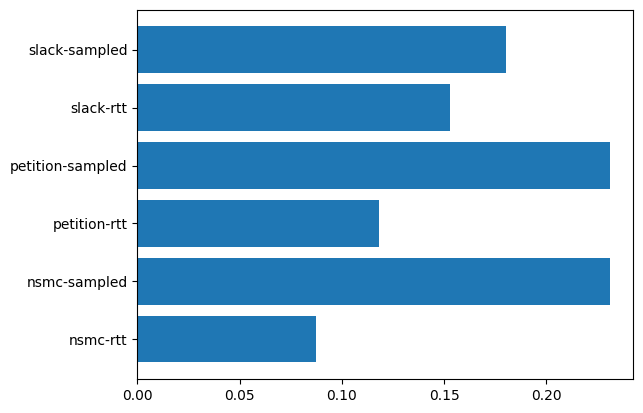

In [123]:
source_dev = df_dev['source'].value_counts().sort_index()
source_dev_rate = source_dev / source_dev.sum()

label = source_dev_rate.index
index = np.arange(len(label))
plt.barh(index, source_dev_rate)
plt.yticks(index, label)

([<matplotlib.axis.YTick at 0x7f6cb4817e80>,
 [Text(0, 0, 'nsmc-rtt'),
  Text(0, 1, 'nsmc-sampled'),
  Text(0, 2, 'petition-rtt'),
  Text(0, 3, 'petition-sampled'),
  Text(0, 4, 'slack-rtt'),
  Text(0, 5, 'slack-sampled')])

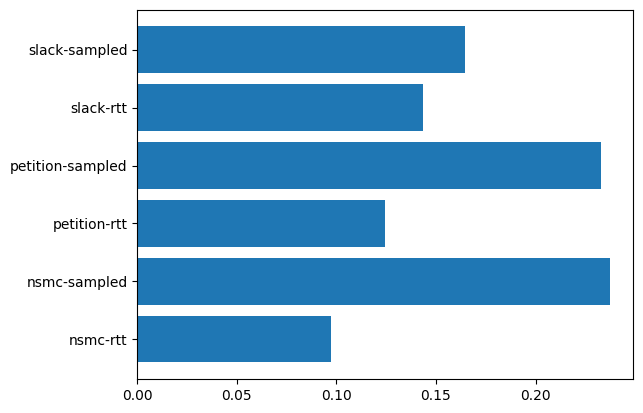

In [125]:
source_test = df_test['source'].value_counts().sort_index()
source_test_rate = source_test / source_test.sum()

label = source_test_rate.index
index = np.arange(len(label))
plt.barh(index, source_test_rate)
plt.yticks(index, label)